In [18]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [2]:
data=pd.read_csv(r"C:\ML books\datasets\online_ad_AB.csv")

In [3]:
data.head()

,customerID,test group,made_purchase,days_with_most_add,peak ad hours,ad_count
0,1,ad,False,24,20,5
1,2,psa,False,21,16,9
2,3,psa,False,1,18,8
3,4,ad,False,20,23,7
4,5,ad,False,3,13,5


In [4]:
data.isnull().sum()

customerID            0
test group            0
made_purchase         0
days_with_most_add    0
peak ad hours         0
ad_count              0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customerID          20000 non-null  int64 
 1   test group          20000 non-null  object
 2   made_purchase       20000 non-null  bool  
 3   days_with_most_add  20000 non-null  int64 
 4   peak ad hours       20000 non-null  int64 
 5   ad_count            20000 non-null  int64 
dtypes: bool(1), int64(4), object(1)
memory usage: 800.9+ KB


In [26]:
purchased_data=data[data["made_purchase"]==True]
ad_data=data[data["test group"]=="ad"]
ad_data_purchased=ad_data[ad_data["made_purchase"]==True]
psa_data=data[data["test group"]=="psa"]
psa_data_purchased=psa_data[psa_data["made_purchase"]==True]

through which advertisement more customers are buying the product ?

<Axes: title={'center': 'No of Customers purchased products through different advertisement types'}, xlabel='test group'>

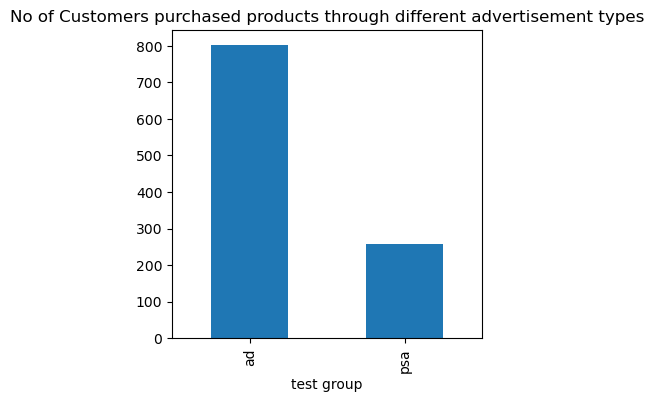

In [7]:
purchased_data.groupby("test group")["customerID"].count().plot.bar(figsize=(4,4),title="No of Customers purchased products through different advertisement types")

through commercial advertisement more people are purchasing the products

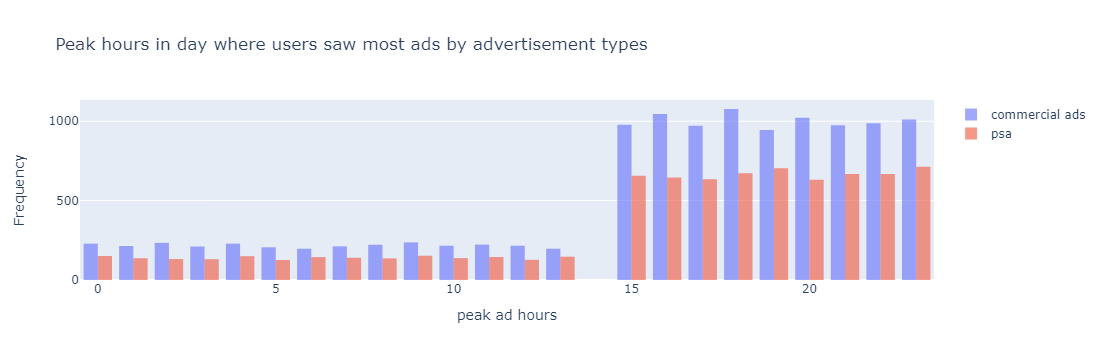

In [32]:
fig=go.Figure()
fig.add_trace(go.Histogram(x=ad_data["peak ad hours"],name="commercial ads",opacity=0.6))
fig.add_trace(go.Histogram(x=psa_data["peak ad hours"],name="psa",opacity=0.6))
fig.update_layout(title_text="Peak hours in day where users saw most ads by advertisement types",
                  xaxis_title_text="peak ad hours",
                  yaxis_title_text="Frequency",
                  #barmode="group",
                  #bargap=0.1
                 )
fig.show()

between 15th hour and 23rd hour most people are seeing the commercial ads (3:00 pm to 11:00 pm)
at 18th,20th hour hour (i.e 6:00pm,8:00pm) most people saw the commercial add

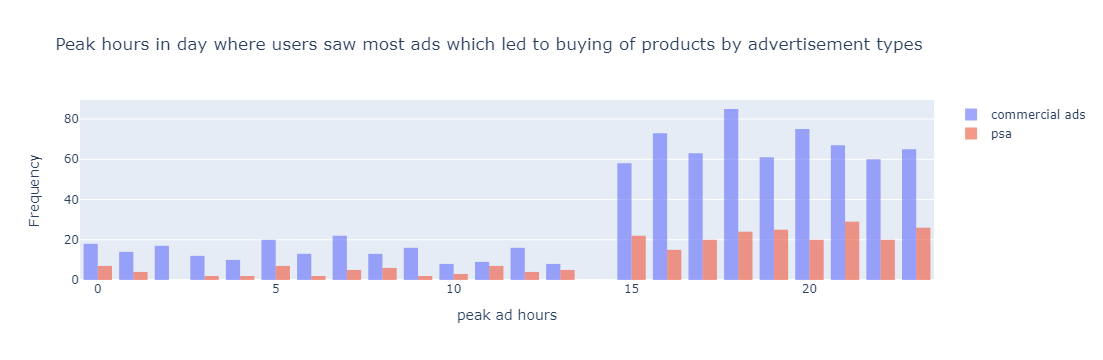

In [45]:
fig=go.Figure()
fig.add_trace(go.Histogram(x=ad_data_purchased["peak ad hours"],name="commercial ads",opacity=0.6))
fig.add_trace(go.Histogram(x=psa_data_purchased["peak ad hours"],name="psa",opacity=0.6))
fig.update_layout(title_text="Peak hours in day where users saw most ads which led to buying of products by advertisement types",
                  xaxis_title_text="peak ad hours",
                  yaxis_title_text="Frequency"
                  #barmode="group",
                  #bargap=0.1
                 )
fig.show()

at 18th,20th hour hour (i.e 6:00pm,8:00pm) most people saw the commercial add which led to buying of the product 

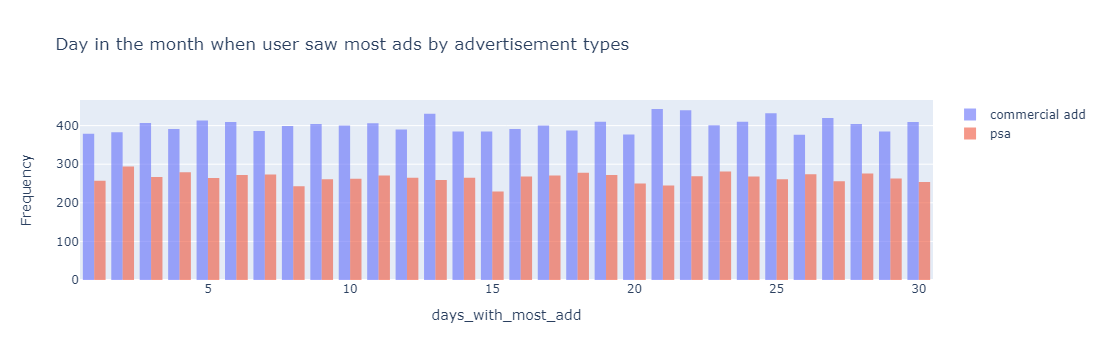

In [23]:
fig=go.Figure()
fig.add_trace(go.Histogram(x=ad_data["days_with_most_add"],name="commercial add",opacity=0.6))
fig.add_trace(go.Histogram(x=psa_data["days_with_most_add"],name="psa",opacity=0.6))
fig.update_layout(title_text="Day in the month when user saw most ads by advertisement types",
                  xaxis_title_text="days_with_most_add",
                  yaxis_title_text="Frequency")
fig.show()

Commercial ads has slightly same viewership throughtout the month

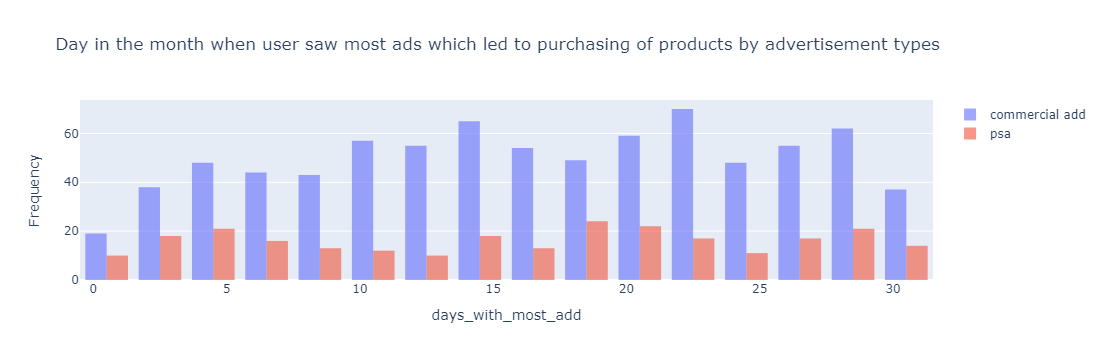

In [29]:
fig=go.Figure()
fig.add_trace(go.Histogram(x=ad_data_purchased["days_with_most_add"],name="commercial add",opacity=0.6))
fig.add_trace(go.Histogram(x=psa_data_purchased["days_with_most_add"],name="psa",opacity=0.6))
fig.update_layout(title_text="Day in the month when user saw most ads which led to purchasing of products by advertisement types",
                  xaxis_title_text="days_with_most_add",
                  yaxis_title_text="Frequency")
fig.show()

between days 22-23 in a month commercial ads viewership led to buying of product

<Axes: title={'center': 'viewership of customers by advertisement types'}, xlabel='test group'>

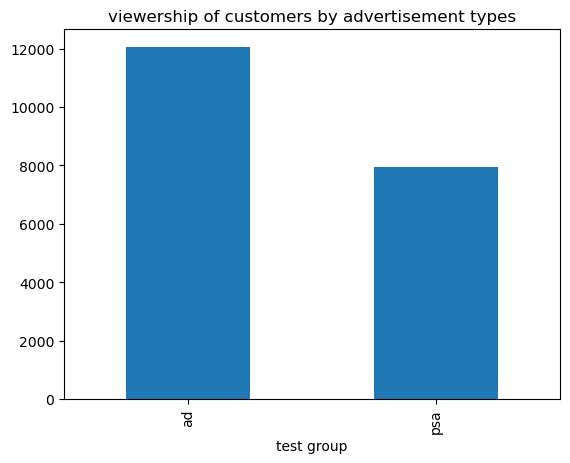

In [40]:
data.groupby("test group")["ad_count"].count().plot.bar(title="viewership of customers by advertisement types")

commercial ads has more viewership than psa

<Axes: title={'center': 'viewership of customers led to buying of products by advertisement types'}, xlabel='test group'>

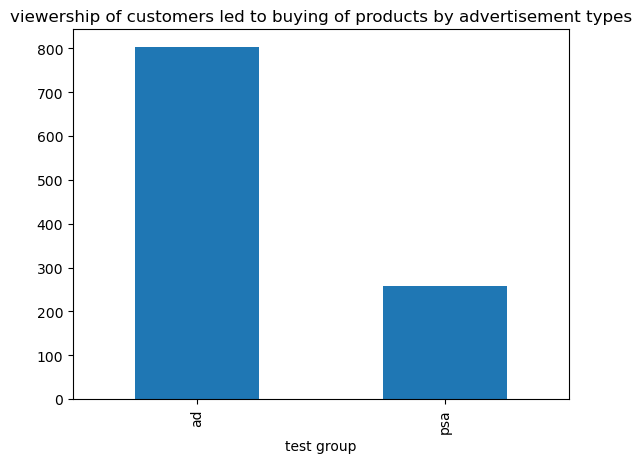

In [46]:
purchased_data.groupby("test group")["ad_count"].count().plot.bar(title="viewership of customers led to buying of products by advertisement types")

commercial ads viewership impacted more in buying of product

A/B testing on success rate of both advertisement types

In [11]:
ad_data_conversion=ad_data[ad_data["made_purchase"]==True].shape[0]
psa_data_conversion=psa_data[psa_data["made_purchase"]==True].shape[0]
print("commercial ad conversion rate",ad_data_conversion/ad_data.shape[0])
print("psa conversion rate",psa_data_conversion/psa_data.shape[0])

commercial ad conversion rate 0.06662241765535551
psa conversion rate 0.03233924751478545


In [12]:
conversions_count=[ad_data_conversion,psa_data_conversion]
sample_sizes=[ad_data.shape[0],psa_data.shape[0]]
zstat,p_val=proportions_ztest(conversions_count,sample_sizes)
print("z stat",zstat)
print("p value",p_val)

z stat 10.590153051109288
p value 3.310501343616513e-26


here p value is less than 0.05 so there is statistically significant difference in success rates of both the advertisements

A/B testing on average viewership of both advertisements

In [43]:
print("avg commercial viewership",ad_data["ad_count"].mean())
print("avg psa viewership",psa_data["ad_count"].mean())

avg commercial viewership 6.38106695428524
avg psa viewership 6.408959355731723


In [44]:
tstat,p_val=stats.ttest_ind(ad_data["ad_count"],psa_data["ad_count"])
print("t stat",tstat)
print("p value",p_val)

t stat -0.7580202793497822
p value 0.4484477749131489


here the assumption is avg viewership for both advertisements is same since p value is greater than 0.05 we don't have strong evidence to reject null hypothesis

more people buying products through commercial ads than psa due to other reasons since the avg viewership is same

Through commercial ads significant success rate is observed through analysis.It's better to go with commercial ads than psa.